# Portfolio 1

## In this portfolio we are working on analysis of the cycling data from social network site `strava` and `Goldencheetah`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import calendar
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

Importing all the necessary libraries and python packages to be used in the analysis.

# Analysis of Cycling Data

## Loading Data

----

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
print("Shape of the Strava Dataframe is:" , strava.shape)
strava.head()

Shape of the Strava Dataframe is: (268, 10)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [3]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
print("Shape of the cheetah dataframe is :", cheetah.shape)
cheetah.head()

Shape of the cheetah dataframe is : (251, 362)


,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Begins with analysis of __`strava`__ and __`Goldencheetah`__ files :

In [4]:
str_cth_join=strava.join(cheetah,how='inner')
print("Shape of the dataframe after joining strava & cheetah file is:",str_cth_join.shape)
str_cth_join.head()

Shape of the dataframe after joining strava & cheetah file is: (243, 372)


,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


# Analysis
----

We have done an __`inner`__ join between the two given datasets- strava and cheetah and stored it in dataframe __`str_cth_join`__. As a result of the inner join we have 243 rows and 372 columns.

## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


In [5]:
result=str_cth_join[(str_cth_join['device_watts']==True)]
result=result.dropna()
print("Shape of the dataframe after removing rides and na values is:", result.shape)

Shape of the dataframe after removing rides and na values is: (144, 372)


# Analysis

----

Rides with no measured power are removed i.e., __`device_watts = True`__ imples it is measured from the power meter whereas False device_watts implies they are estimated so we are just keeping the rows with measured power and also dropping columsn with NaN values.

In [6]:
pd.options.mode.chained_assignment = None
result['elevation_gain'] = pd.to_numeric(result['elevation_gain'].str.split().str[0])

# Analysis

----

Converting `elevation_gain` into numeric form so that data can be plotted for this variable.

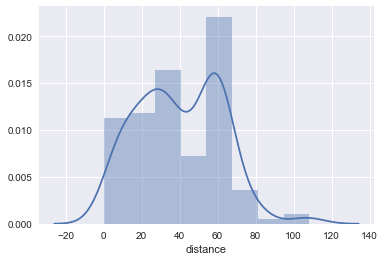

In [7]:
sn.distplot(result['distance'])
plt.show()

# Analysis

----

As per the above metalib diagram , distribution of the variable __`distance`__ is __`bi- modal`__. Bi modal distribution has two peaks.

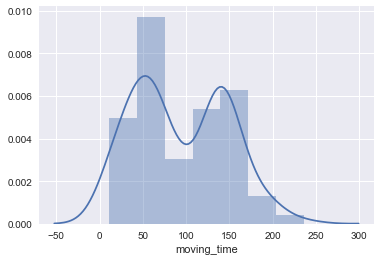

In [8]:
sn.distplot(result['moving_time'])
plt.show()

# Analysis

---

As per the above metalib diagram , distribution of the variable __`moving_time`__ is __`bi- modal`__.

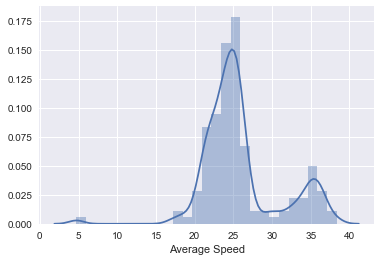

In [9]:
sn.distplot(result['Average Speed'])
plt.show()

# Analysis

---

As per the above metalib diagram , distribution of the variable __`Average_speed`__ is __`left skewed`__. __`Left skewed`__ distribution occurs when mean is less than the median and tail is tilted towards the left.

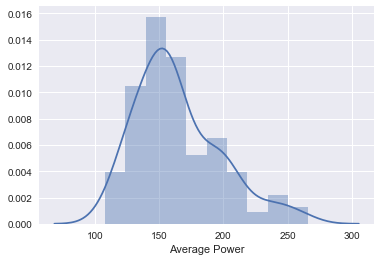

In [10]:
sn.distplot(result['Average Power'])
plt.show()

# Analysis

----

As per the above metalib diagram , distribution of the variable __`Average Power`__ is __`almost normally`__ distributed. 

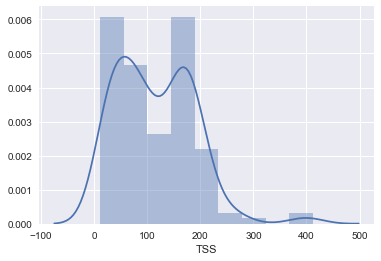

In [11]:
sn.distplot(result['TSS'])
plt.show()

# ANALYSIS

----

As per the above metalib diagram , distribution of the variable __`TSS`__ is __`right skewed`__.

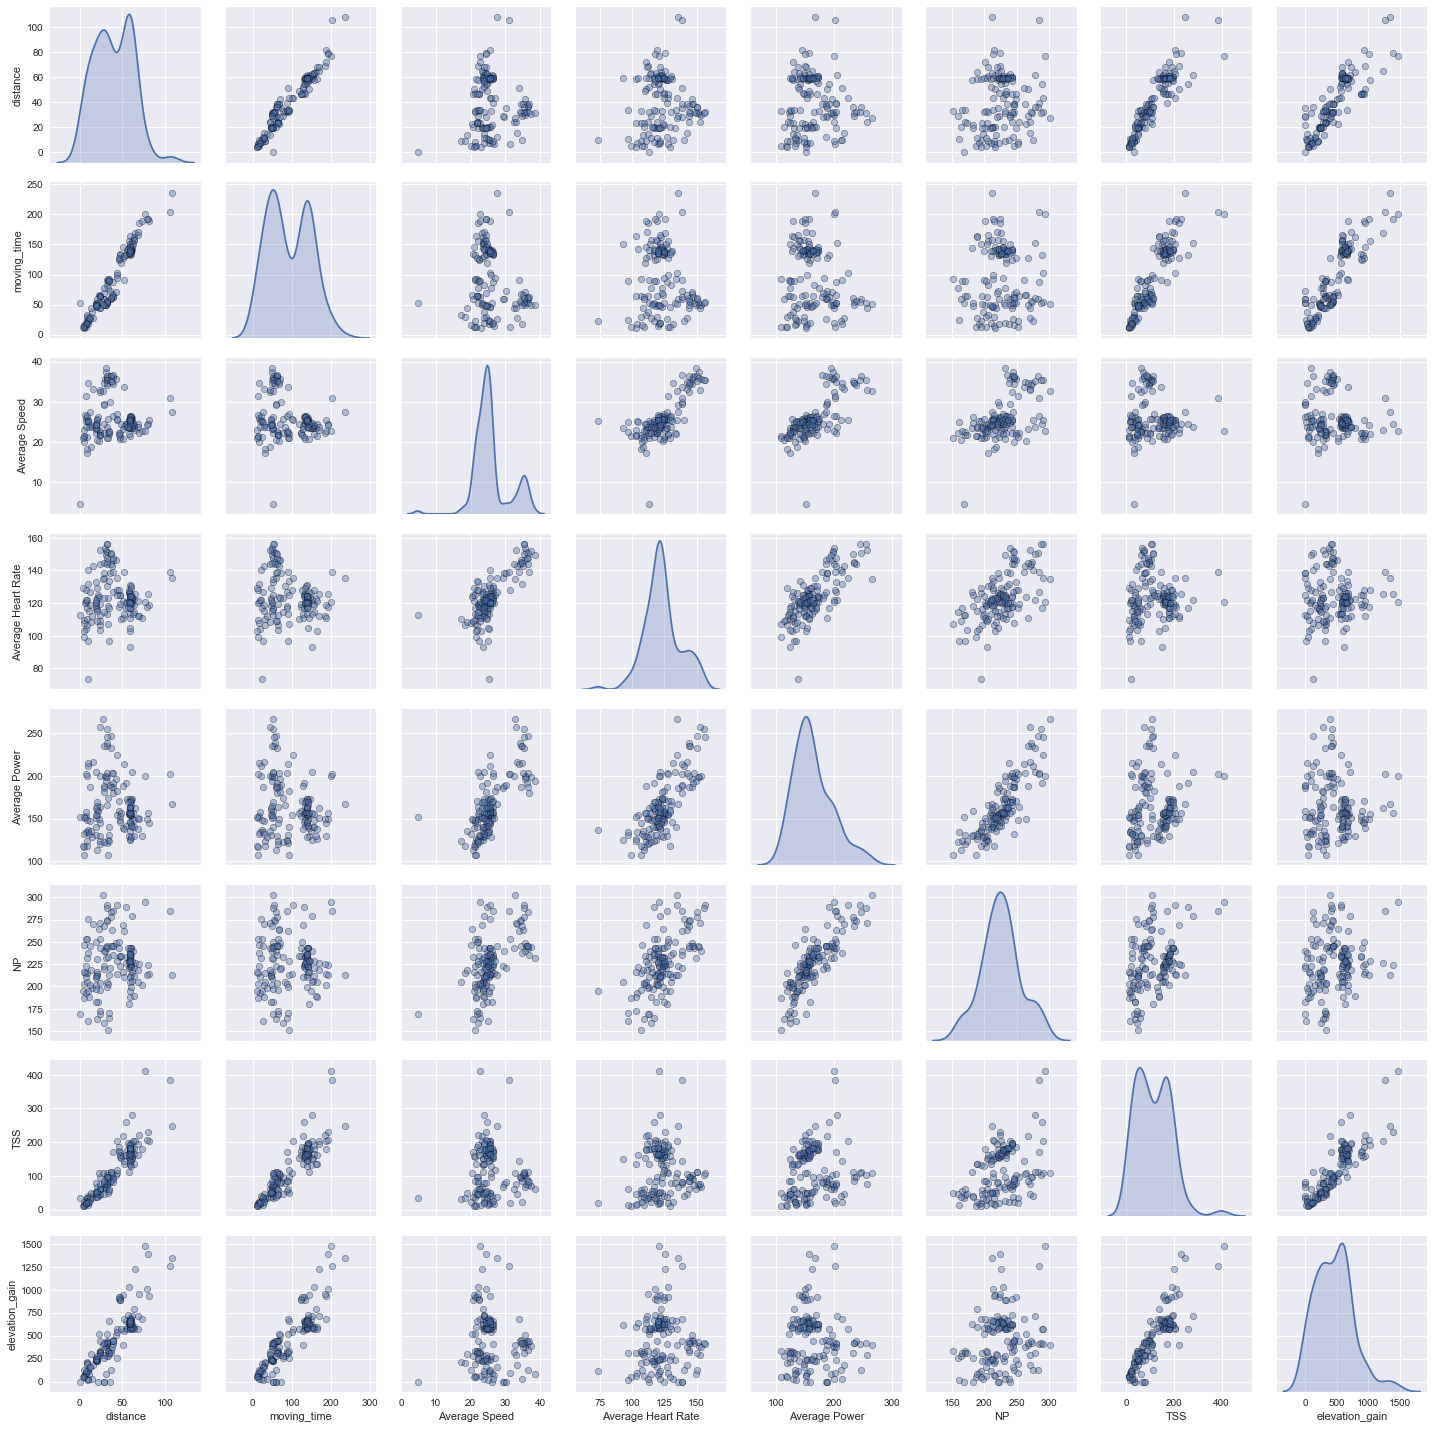

In [12]:
corr_result =result[["distance", "moving_time","Average Speed","Average Heart Rate","Average Power","NP","TSS","elevation_gain"]]
sn.pairplot(corr_result,diag_kind = 'kde',plot_kws = {'alpha': 0.4, 's': 40, 'edgecolor': 'k'})

# Analysis

----

Pairplot has clearly shown the correlation between all required variables such as __`distance, moving_time, Average Speed, Average Power, Average Heart Rate, NP (Normalised Power), TSS and elevation gain.`__

In [13]:
corr_result=result[['distance','Time Moving','Average Speed','NP','TSS','elevation_gain','Average Heart Rate','Average Power']]
corr_mtx_result=corr_result.corr()
corr_mtx_result

,distance,Time Moving,Average Speed,NP,TSS,elevation_gain,Average Heart Rate,Average Power
distance,1.000000,0.968110,0.034581,0.156948,0.909636,0.869634,0.057835,-0.010553
Time Moving,0.968110,1.000000,-0.192527,0.031393,0.897472,0.882298,-0.114745,-0.169354
Average Speed,0.034581,-0.192527,1.000000,0.536113,-0.030817,-0.089907,0.757362,0.731292
NP,0.156948,0.031393,0.536113,1.000000,0.397483,0.205713,0.596401,0.841682
TSS,0.909636,0.897472,-0.030817,0.397483,1.000000,0.872069,0.053536,0.136925
elevation_gain,0.869634,0.882298,-0.089907,0.205713,0.872069,1.000000,0.040688,-0.031666
Average Heart Rate,0.057835,-0.114745,0.757362,0.596401,0.053536,0.040688,1.000000,0.758055
Average Power,-0.010553,-0.169354,0.731292,0.841682,0.136925,-0.031666,0.758055,1.000000


# Analysis

----

corr_mtx_result is the correlation matrix between the variables aformentioned in the previous cell, negative values are highlighted in the red. Higher the value in the correlation matrix depicts higher the realtion between the two respective variables.

###### Highly correlated: 

__`Distance`__ with __`Time Moving`__, __`Distance`__ with __`TSS`__, __`distance`__ with __`Elevation Gain`__.

###### Weakly correlated:

__`Distance`__ with __`Average Speed`__, __`Distance`__ with __`Normalized Power`__, __`Distance`__ with __`Average Heart Rate`__ and __`Distance`__ with __`Average Power`__.

###### Negatively correlated:

__`Time Moving`__ and __`Average Power`__, __`Average Speed`__ and __`Time Moving`__, __`Average Speed`__ and __`Elevation Gain`__ etc.

In [14]:
wride=result[(result['workout_type']=='Ride')]
print("Shape of dataframe with workout type only Rides is ", wride.shape)

wrace=result[(result['workout_type']=='Race')]
print("Shape of dataframe with workout type only Race is ", wrace.shape)

wworkout=result[(result['workout_type']=='Workout')]
print("Shape of dataframe with workout type only workout is ", wworkout.shape)

Shape of dataframe with workout type only Rides is  (113, 372)
Shape of dataframe with workout type only Race is  (26, 372)
Shape of dataframe with workout type only workout is  (5, 372)


# Analysis

----

Above piece of the code divide the result dataframe into three sub categories __`wride`__ with which has only __`ride`__ type of workout, __`wrace`__ which has only __`race`__ category records and __`wworkout`__ which has only __`workout`__ type data.

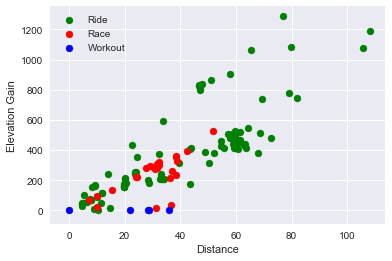

In [15]:
plt.scatter(wride["distance"],wride["Elevation Gain"],color='green', label="Ride")
plt.scatter(wrace["distance"],wrace["Elevation Gain"],color='red', label="Race")
plt.scatter(wworkout["distance"],wworkout["Elevation Gain"],color='blue',label="Workout")
plt.xlabel("Distance")
plt.ylabel("Elevation Gain")
plt.legend()
plt.show()

# Analysis

----

In the above scatter plot between __`Distance`__ and __`elapsed_time`__ for __`Ride, Race and Workout`__. Distance is the how far they travel from the starting time and elevation gain is how many meteres climbed during the ride. We draw looming conclusions from the scatter plot :

1. For Ride, as distance increases, the elevation_gain also increases continuously.
2. For Race, as distance increases, the elevation_gain also increases to a certain level.
3. For Workout, as distance increases, the elevation_gain remains constant . It depicts cyclist who are doing workout type of cycling are more focussed on covering distance rather than climbing.

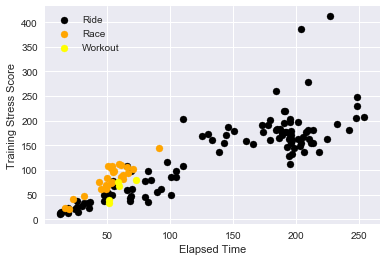

In [16]:
plt.scatter(wride["elapsed_time"],wride["TSS"],color='black', label="Ride")
plt.scatter(wrace["elapsed_time"],wrace["TSS"],color='orange', label="Race")
plt.scatter(wworkout["elapsed_time"],wworkout["TSS"],color='yellow',label="Workout")
plt.xlabel("Elapsed Time")
plt.ylabel("Training Stress Score")
plt.legend()
plt.show()

# Analysis

----

In the above scatter plot between __`Elapsed time`__ and __`TSS`__ for __`Ride, Race and Workout`__. Elapsed time is the time taken for the ride and TSS stands for Trainig Stress Score , it detemines how hard the ride was. We come to below conclusions :

1. For Ride, as elapsed_time increases, the TSS increases continuosly.
2. For Race, as elapsed_time increases, the TSS also increases but to a certain level.
3. For Workout, as elapsed_time increases , the TSS also shown some increase but less than Ride type and it determines workout type cyclists are involved in less hard workout than ride type and race type .

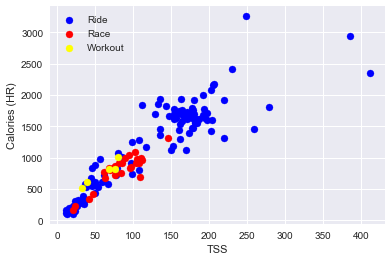

In [17]:
plt.scatter(wride["TSS"],wride["Calories (HR)"],color='blue', label="Ride")
plt.scatter(wrace["TSS"],wrace["Calories (HR)"],color='red', label="Race")
plt.scatter(wworkout["TSS"],wworkout["Calories (HR)"],color='yellow',label="Workout")
plt.xlabel("TSS")
plt.ylabel("Calories (HR)")
plt.legend()
plt.show()

# Analysis

----

In the above scatter plot between __`TSS`__ and __`Calories(HR)`__ for __`Ride, Race and Workout`__. Calories (HR) is the calorie expendature as estimated from heart rate data.and TSS stands for Trainig Stress Score , it detemines how hard the ride was. We come to below conclusions :

1. For Ride, as TSS increases, the Calories(HR) increases continuosly and it is obvious as well because more calories would be required for the harder ride.
2. For Race, as TSS increases, the Calories(HR) also increases but to a certain level and it also show some constant values as well.
3. For Workout, as TSS increases , cyclists spend less calories than Ride and Race types.

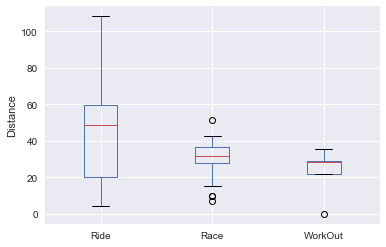

In [18]:
distdf=pd.concat([wride['Distance'],wrace['Distance'],wworkout['Distance']], axis=1, keys=['Ride', 'Race','WorkOut'])
distdf.boxplot()
plt.ylabel("Distance")
plt.show()

# Analysis

----

From the above boxplots, we can draw the following conclusions for __`Distance`__:

1. For Ride type, the values start from 0 and go upto a range beyond 100 (i.e whisker extends from around 0 to somewhere around 112) and there are no outliers outside this range.
2. For Race type,boxplot clearly depicts various outliers (data falls outside the range of the boxplot) and the whisker does not extend much as compared to the boxplot for workout_type = Ride
3. For Workout type, spread of the boxplot is quite small and there is only one outlier in comparison of 3 outliers in the race type.

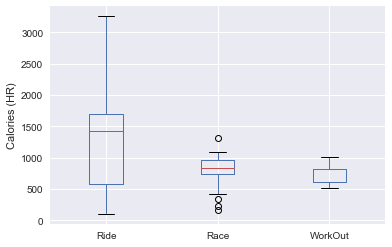

In [19]:
distdf=pd.concat([wride['Calories (HR)'],wrace['Calories (HR)'],wworkout['Calories (HR)']], axis=1, keys=['Ride', 'Race','WorkOut'])
distdf.boxplot()
plt.ylabel("Calories (HR)")
plt.show()

# Analysis

---

From the below boxplots, we can draw the following conclusions for __`Calories(HR)`__:

1. For Ride type, the values start from 0 and go upto a range beyond 30000 (whisker starts from 0 and extend beyond 3000 ) and there are no outliers outside this range.
2. For Race type,boxplot clearly depicts various outliers (data falls outside the range of the boxplot) and the whisker does not extend much as compared to the boxplot for workout_type = Ride
3. For Workout type, spread of the boxplot is quite similar to the race type but there is no outlier in this dataframe.

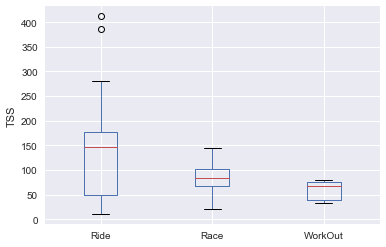

In [20]:
distdf=pd.concat([wride['TSS'],wrace['TSS'],wworkout['TSS']], axis=1, keys=['Ride', 'Race','WorkOut'])
distdf.boxplot()
plt.ylabel("TSS")
plt.show()

# Analysis

----

From the above boxplots, we can draw the following conclusions for __`TSS`__:

1. For Ride type, the values start from 0 and go upto a range beyond 280 (whisker starts from 0 and extend beyond 280 ) and there are two outliers outside this range.
2. For Race type,the spread is relatively smaller than previous dataframe but it has no value outside the range.
3. For Workout type, the median is more or less similart with race type.

# `CHALLENGE ANALYSIS`

In [21]:
kudos_rel=[result[result.columns[1:]].corr()['kudos'][:]] #result, dataframe where only rides keep whose measeure power is True
kudos_rel_df = pd.DataFrame(kudos_rel)
kudos_rel_df=kudos_rel_df.loc[:,kudos_rel_df.gt(0.7).any()]
kudos_rel_df

,distance,kudos,Distance,Max Core Temperature,Aerobic TISS,Distance Swim,TRIMP Points,TRIMP(100) Points,TRIMP Zonal Points
kudos,0.722458,1.0,0.722582,0.73212,0.719443,0.722582,0.740524,0.740524,0.722062


# Analysis

---

From the above code, we can conclude that the below factors leads to more Kudos/Likes:

distance ( from strava file), Distance (from GoldenCheetah), Work, Aerobic TISS, P6 Time in Pace Zone, Distance Swim, L7 Time in Zone, TRIMP Zonal Points, W' Work and W2 W'bal Moderate Fatigue variables with a correlation of above 0.7 for each with kudos.

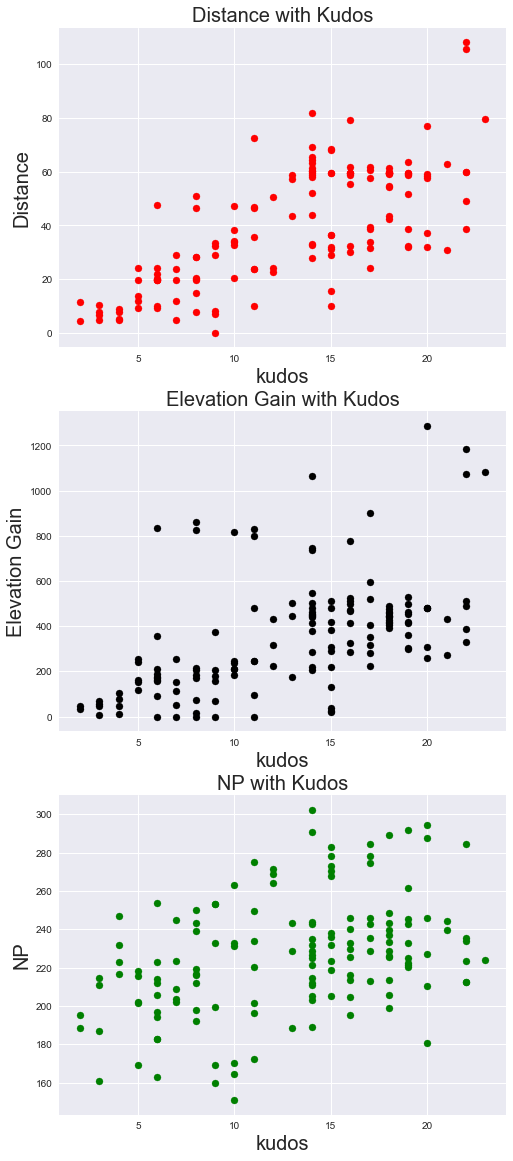

In [22]:
fig,axs=plt.subplots(3,1,figsize=(8,20))

#Kudos relationship with distance
axs[0].scatter(result['kudos'], result['Distance'], color='red')
axs[0].set_xlabel('kudos' ,size =20)
axs[0].set_ylabel('Distance',size =20)
axs[0].set_title('Distance with Kudos',size =20)

#Kudos relationship with Elevation Gain
axs[1].scatter(result['kudos'], result['Elevation Gain'], color='black')
axs[1].set_xlabel('kudos',size =20)
axs[1].set_ylabel('Elevation Gain',size =20)
axs[1].set_title('Elevation Gain with Kudos',size =20)

#Kudos relationship with NP
axs[2].scatter(result['kudos'], result['NP'], color='green')
axs[2].set_xlabel('kudos',size =20)
axs[2].set_ylabel('NP',size =20)
axs[2].set_title('NP with Kudos',size =20)
plt.show()

# Analysis

---

Above scatter plots depicts the relationship between kudos and main variables such __`distance, elevation_gain and NP`__.
We can summarize below scatter plots as below :

1) In the first scatter plot between **kudos and Distance**, it illustrates as the distance is increasing there is increase in the kduos as well. This clearly depicts that distanc and kudos are proportional to each other.

2) In the second scatter plot between **kudos and elevation_gain**, it shows mixed trend between the two variables. Elevation_gain increases but kudos remains constant and vice versa.

3) In the last scatter plot between **kudos and NP**, it shows that relationship between these two is starting from the high value not from the 0.

In [23]:
month_name=[]
for e in result.index:
    month_name.append((calendar.month_name[e.month]))
result.insert(2, "Month", month_name, True) 
month_data_df=pd.DataFrame(result.groupby(['Month']).distance.sum())
month_data_df['TSS']=result.groupby(['Month']).TSS.sum()
month_data_df['Average Speed']=result.groupby(['Month'])['Average Speed'].mean()
month_data_df

,distance,TSS,Average Speed
Month,,,
April,782.4,2274.6801,24.918635
August,127.5,522.1341,25.169500
December,400.4,1106.8375,27.075000
February,700.8,1966.2923,26.016750
January,390.8,1083.7889,26.182430
July,461.5,1241.1682,25.500000
June,560.2,1617.3223,27.086453
March,871.1,2762.8343,26.268610
May,598.3,1702.5335,25.351987


# ANALYSIS

Above code is to predict get the __`distance`__ travelled ,__`TSS`__ and __`average speed`__ month wise. It is clearly show that most distance is travelled in the __`March`__ month and  it has highest TSS score as well whereas __`September`__ has highest average speed recorded.
There two bar graphs in the end which depicts this analysis in a graph form for better understanding.

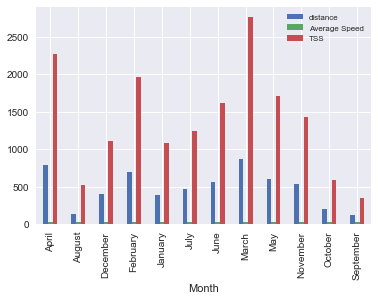

In [24]:
month_data_df.plot( y=["distance", "Average Speed", "TSS"], kind="bar")
plt.rcParams["figure.figsize"] = (8,10)
plt.legend(loc='best', prop={'size': 8})
plt.show()

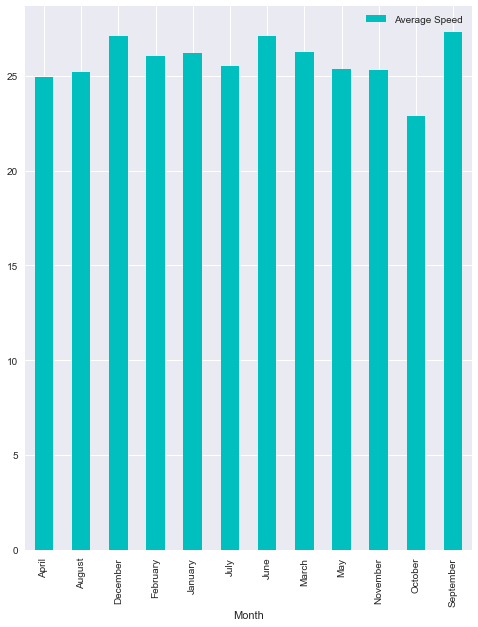

In [25]:
month_data_df.plot( y=["Average Speed"], kind="bar", color="c")
plt.rcParams["figure.figsize"] = (9,11)
plt.legend(loc='best', prop={'size':10})
plt.show()

# Conclusion

We can conclude that __`March`__ month has the highest distance travelled by the cyclists and their TSS score is also maximum in the same month, whereas __`September`__ month has lowest the distance travelled.

__`Average Speed`__ is highest during the __`September`__ month .